In [1]:
### 모델 평가방법을 배워보자
### 모델은 예측 성능이 높아야 유용합니다
### model_evaluate(모델평가).pdf 참고
'''
교차검증 모델
 실전에서 모델이 얼마나 잘 동작하는지 평가하려면 데이터 전처리 파이프라인을 만들고 모델을 훈련한 다음 교차
검증을 평가합니다.
'''

#지도학습에서 사용하는 방법 
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits() # 데이터셋 로드

features = digits.data # 특성 행렬을 만듭니다.
target = digits.target # 타깃 벡터를 만듭니다.
standardizer = StandardScaler() # 표준화 객체를 만듭니다.
logit = LogisticRegression() # # 로지스틱 회귀 객체를 만듭니다

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증을 만듭니다. (10 개의 폴드를 만듬)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, features, target, cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
cv_results.mean() # 평균을 계산

0.9693916821849783

In [2]:
cv_results ## 10개 폴드의 점수를 모두 확인(평가 점수는 cv_results에 저장)

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [5]:

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split( features, target, test_size=0.1, random_state=1)

standardizer.fit(features_train) # 훈련 세트로 standardizer의 fit 메서드를 호출

# 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

pipeline = make_pipeline(standardizer, logit) # 파이프라인을 만듭니다.

# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
cv_results.mean() #평균을 계산합니다

0.9693916821849783

In [6]:
'''
교차검증모델(이어서)
 k-폴드 교차검증(KFCV)는 데이터를 폴드(fold)라고 부르는 k개의 부분을 나눕니다
 k-1개 폴드를 하나의 훈련 세트로 합쳐 모델을 훈련하고 남은 폴드를 테스트 세트처럼 사용합니다.
 이를 k번 반복마다 다른 폴드를 테스트 세트로 사용합니다.
 k번 반복해서 얻은 모델 성능을 평균하여 최종 성능을 산출합니다
 KFCV 사용 고려할 점
1. KFCV는 각 샘플이 다른 샘플과 독립적으로 생성되었다고 가정합니다.
2. KFCV를 사용하여 분류기를 평가할 때, 각 타깃 클래스의 샘플이 거의 같은 비율로 폴드에 담기는 것이 좋습니다.
예] 성별 타깃 벡터 중에서 80% 샘플이 남성이라면 각 폴드도 80% 남성과 20% 여성 샘플로 이루어져야 합니다
 사이킷런에서는 KFold 클래스를 StratifiedKFold로 바꾸어 계층별 k-폴드 교차검증을 수행할 수 있습니다
 사이킷런의 pipeline 패키지는 교차검증 기법을 사용할 때 먼저 데이터를 전처리(standardizer)하고 모델(로지스틱
회귀)을 훈련하는 규칙을 손쉽게 구현할 수 있도록 도와줍니다.
 LOOCV(leave-one-out-cross-validation)는 폴드의 수 k가 샘플의 개수와 같습니다.
 cross_val_score의 cv는 교차검증 기법을 결정합니다.
 LOOCV는 LeaveOneOut 클래스에 구현되어 있습니다.
 LeaveOneOut 클래스는 KFold(n_splits=n)과 동일합니다. (n은 샘플 개수)
'''
'''
 KFold와 StratifiedKFold의 n_splits 매개변수 기본값은 3입니다 (사이킷런 0.22버전부터 이기본값 5)
 ShuffleSplit는 반복 횟수에 상관없이 훈련 폴드와 테스트 폴드 크기를 임의로 지정할 수 있습니다.
 train_size, test_size 매개변수에는 사용할 샘플 개수 또는 비율을 입력합니다.
 반복마다 랜덤하게 분할하기 때문에 하나의 샘플이 여러 번 테스트 폴드에 포함될 수 있습니다.
 계층별 교차 검증을 위한 StratifiedShuffleSplit도 있습니다
'''
#훈련 폴드로 50%, 테스트 폴드로 20%를 사용하여 10번 반복하는 실습입니다.
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
cv_results.mean() # 평균을 계산합니다.

0.9630555555555554

In [8]:
# 훈련 폴드로 50%, 테스트 폴드로 20%를 사용하여 10번 반복하는 실습입니다
# 사이킷런에서 교차 검증을 반복하여 실행할 수 있는 RepeatedKFold 와 StratifiedRepeatedKFold
# n_splits 매개변수 기본값은 5이고 n_repeats 매개변수 기본값은 10입니다.
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 객체 생성
# 시드값(random_state) 으로 결과 고정(아무값이나)
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42) #다섯번 반복수행

# 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rfk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

len(cv_results) # 검증 점수 개수를 확인(당연히 50개)
cv_results.mean()

0.9695065176908755

In [9]:
'''
기본 회귀 모델
 사이킷런의 DummyRegressor를 사용하여 기본 모델로 사용할 간단한 더미 모델을 만듭니다.
 DummyRegressor 클래스는 실제 모델과 비교하기 위해 사용할 수 있는 매우 간단한 모델을 
  만듭니다.
 Dumm yRegressor 클래스는 strategy 매개변수를 사용하여 예측 방법을 지정합니다.
 훈련 세트의 평균 또는 중간값을 사용할 수 있습니다.
'''

#Boston Dataset을 이용하여 실습 
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

boston = load_boston() # 데이터를 로드
features, target = boston.data, boston.target # 특성을 만듭니다.

features_train, features_test, target_train, target_test = train_test_split(
            features, target, random_state=0) # 훈련 세트와 테스트 세트를 나눕니다.

dummy = DummyRegressor(strategy='mean') # 더미 회귀 모델을 만듭니다.

In [10]:
dummy.fit(features_train, target_train) # 더미 회귀 모델을 훈련합니다.

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [11]:
dummy.score(features_test, target_test) # R^2 점수를 계산합니다.(결정계수)

-0.001119359203955339

In [12]:
'''
기본 회귀 모델(이어서)
 strategy를 constant로 지정하고 constant 매개변수를 사용하면 모든 샘플에 대해 일정한 값으로 예측하는 더미 회
귀 모델을 만들 수 있습니다.
'''
from sklearn.linear_model import LinearRegression
ols = LinearRegression() # 간단한 선형 회귀 모델을 훈련
ols.fit(features_train, target_train)
ols.score(features_test, target_test) # R^2 점수를 계산


0.6354638433202104

In [13]:
# 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델을 만듭니다.
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)
clf.score(features_test, target_test) # 점수를 계산

-0.06510502029325727

In [14]:
'''
기본 회귀 모델(이어서)
 strategy가 mean일 때 평균값으로 예측하고 median일 때 중간값으로 예측합니다.
 quantile로 지정하면 quantile 매개변수에 지정한 분위값을 예측으로 사용합니다
 quantile 매개변수에는 0과 1 사이의 실수값을 지정하면 0.5일 때 중간값과 같고 
  0이면 최솟값, 1이면 최댓값입니다.
'''
clf = DummyRegressor(strategy='quantile', quantile=1.0)
clf.fit(features_train, target_train)

# 훈련 세트 타깃의 최대값으로 예측합니다.
clf.predict(features_test)

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

In [15]:
import numpy as np
# 훈련 세트의 타깃에서 최댓값을 확인합니다.
np.max(target_train)

50.0

In [17]:
'''
기본 분류 모델
 사이킷런의 DummyClassifier 의 strategy 매개변수는 예측값을 생성하는 여러 가지 옵션을 제공합니다.
 stratified 옵션은 훈련 세트에 있는 타깃 벡터의 클래스 비율에 비례하는 예측을 만듭니다.
 uniform 옵션은 클래스 비중이 균등하도록 랜덤하게 예측합니다.
 most_frequent 옵션은 무조건 훈련 세트에서 가장 많은 타깃 레이블로 예측을 만듭니다.
'''
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris() # 데이터 로드
features, target = iris.data, iris.target # 타깃 벡터와 특성 행렬을 만듭니다.

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split( features, target, random_state=0)

# 더미 분류 모델을 만듭니다.
dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(features_train, target_train) # 모델 훈련
dummy.score(features_test, target_test) # 정확도 점수를 계산

0.42105263157894735

In [18]:
#랜덤 포레스트 기법사용 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier() # 분류 모델을 만듭니다.
classifier.fit(features_train, target_train) # 모델 훈련
classifier.score(features_test, target_test) # 정확도 점수를 계산


0.9736842105263158

In [23]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)
# 훈련 세트 타깃에서 가장 많은 값으로 예측합니다.
dummy.predict(features_test) #2
dummy.score(features_test, target_test)

0.23684210526315788

In [ ]:
'''
이진 분류기의 예측 평가
 사이킷런의 cross_val_score 함수를 사용하여 교차검증을 수행할 때 scoring 매개변수에 성능 지표 중 하나를 선택
할 수 있습니다.
 True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
 False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
 False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
 True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)
'''

In [24]:
'''
이진 분류기의 예측 평가(이어서)
 사이킷런의 cross_val_score 함수를 사용하여 교차검증을 수행할 때 scoring 매개변수에 성능 지표 중 하나를 선택
할 수 있습니다.
'''
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)
logit = LogisticRegression() # 로지스틱 회귀 모델을 만듭니다
cross_val_score(logit, X, y, scoring="accuracy") # 정확도를 사용하여 교차검증을 수행합니다

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [25]:
'''
이진 분류기의 예측 평가(이어서)
 정확도 : 예측한 샘플의 비율
 정밀도 : 양성으로 예측한 샘플 중에서 진짜 양성 클래스의 비율(에측에 포함된 잡음)
           TP/(TP+FP)
 재현율 : 진짜 양성 샘플 중에서 양성으로 예측한 비율
           TP/(TP+FN)
 F1은 정밀도와 재현율의 조화 평균입니다
'''
# 정밀도를 사용한 교차검증
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [26]:
# 재현율을 사용한 교차검증
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [27]:
# f1 점수를 사용한 교차검증
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [28]:
'''
이진 분류기의 예측 평가(이어서)
 cross_val_score()의 cv 매개변수를 지정하지 않으면 회귀일 때는 KFold, 
  분류일 때는 StratifiedKFold 분할기가 사용됩니다.
 cv 매개변수에 정수를 입력하여 기본 분할기의 폴드 수를 지정할 수 있습니다.
 cross_validate() 는 scoring 매개변수에 여러 개의 평가 지표를 추가할 수 있습니다.
'''
#직접계산
#y값과 예측한 y값을 이용하여 직접 정확도와 재현율 계산
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1, 
                                                    random_state=1)
# 테스트 세트의 예측을 만듭니다.
y_hat = logit.fit(X_train, y_train).predict(X_test)

# 정확도를 계산합니다.
accuracy_score(y_test, y_hat)

0.947

In [29]:
from sklearn.model_selection import cross_validate
# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])

{'fit_time': array([0.01199269, 0.01199293, 0.01199198, 0.01199365, 0.01199245]),
 'score_time': array([0.00199938, 0.00199938, 0.00199771, 0.00099897, 0.00099897]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

In [30]:
'''
이진 분류기 임계값 평가
 ROC곡선은 이진 분류기의 품질을 평가하는 데 널리 사용하는 방법입니다.
 ROC는 확률 임곗값마다 진짜 양성과 거짓 양성 개수를 비교합니다.
 ROC 곡선을 그리면 모델의 성능을 확인할 수 있습니다.
 사이킷런에서는 roc_curve 함수를 사용하여 임곗값마다 진짜 양성과 거짓 양성을 계산하여 그래프를 그릴 수 있습
니다.
'''
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples=10000,
                                       n_features=10, 
                                       n_classes=2, 
                                       n_informative=3, 
                                       random_state=3)
# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
                            features, target, test_size=0.1, random_state=1)
logit = LogisticRegression() # 분류기를 만듭니다.
logit.fit(features_train, target_train) # 모델을 훈련합니다.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

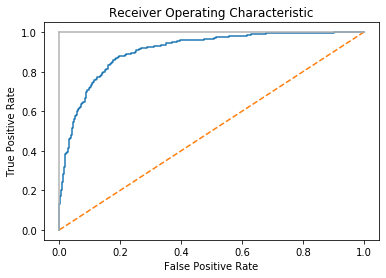

In [32]:
target_probabilities = logit.predict_proba(features_test)[:,1]

#진짜 양성비율(TPR)=진짜양성/(진짜양성+거짓음성)
#거짓 양성비율(FPR)=거짓양성/(거짓양성+진짜음성)

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, 
                                                               target_probabilities)
# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [33]:
# 예측 확률을 계산합니다.
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [36]:
logit.classes_

array([0, 1])

In [37]:
print("임계값:", threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:", false_positive_rate[116])
print("임계값:", threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:", false_positive_rate[45])

# ROC 곡선 아래 면적을 계산합니다.
roc_auc_score(target_test, target_probabilities)

임계값: 0.5331715230155317
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725
임계값: 0.818913387665929
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.047058823529411764


0.9073389355742297

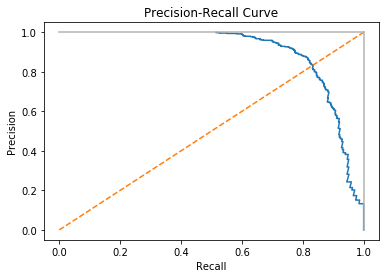

In [38]:
from sklearn.metrics import precision_recall_curve

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
precision, recall, threshold = precision_recall_curve(
                                        target_test, target_probabilities)
# ROC 곡선을 그립니다.
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0, 1], ls="--")
plt.plot([1, 1], c=".7"), plt.plot([1, 1], [1, 0] , c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()


In [39]:
from sklearn.metrics import average_precision_score

# 평균 정밀도를 계산합니다.
average_precision_score(target_test, target_probabilities)

0.8984128719848977

In [40]:
#scoring매개변수에 ROCAUC와 평균 정밀도를 평가 지표로 지정 할 수 있습니다.
cross_validate(logit, features, target, scoring=["roc_auc", "average_precision"])

{'fit_time': array([0.01199341, 0.01199222, 0.00999308, 0.01099348, 0.010993  ]),
 'score_time': array([0.00299788, 0.00199842, 0.00199866, 0.00199842, 0.00199986]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

In [ ]:
'''
이진 분류기 임계값 평가(이어서)
 TPR(재현율)과 FPR 간의 트레이드오프를 시각화하는 것 외에 ROC 곡선은 일반적인 모델 지표로 사용할 수도 있
습니다.
 좋은 모델일수록 곡선이 위로 올라가므로 곡선 아래 면적이 커집니다.
 ROC 곡선 아래 면적(AUCROC)을 계산하여 모든 가능한 임계값에서 모델의 전반적인 품질을 평가합니다
 AUCROC가 1에 가까울수록 더 좋은 모델입니다.
 사이킷런에서는 roc_auc_score()함수를 사용하여 AUCROC를 계산할 수 있습니다.
 precision_recall_curve()함수를 사용해 임계점마다 정밀도와 재현율을 계산하여 정밀도-재현율 곡선을 그립니다.
 정밀도-재현율 곡선에서는 오른쪽 맨 위에 가까울수록 좋은 모델입니다. 이 곡선의 아래 면적을 평균 정밀도라고
부르며 average_precision-score 함수를 사용해 계산할 수 있습니다.
'''

In [41]:
'''
다중클래스 분류기 예측 평가
 클래스가 균형 잡혀 있는 경우 다중 클래스에서도 정확도는 간단하고 해석이 용이한 평가 지표입니다.
 훈련 데이터를 이진 클래스처럼 취급하는 방식으로 다중 클래스 환경에도 적용할 수 있습니다.
 데이터에 하나의 클래스만 있는 것처럼 각 클래스에서 측정한 값을 수집하여 평균함으로써 전체 클래스에 대한 평
가 점수를 얻을 수 있습니다.
'''

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples = 10000,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       random_state = 1)

logit = LogisticRegression() # 로지스틱 회귀 모델 객체 생성
# 정확도를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [42]:
'''
다중클래스 분류기 예측 평가(이어서)
 _macro는 클래스별 평가 점수를 평균하는 방법을 나타냅니다.
 macro : 각 클래스를 동등한 가중치로 클래스별 측정 점수를 평균합니다.
 weighted : 샘플 개수에 비례하여 각 클래스별 측정 점수를 평균합니다.
 micro : 클래스별 TP, TN, FP, FN을 모두 더하여 계산합니다.
'''
# 마크로 평균 F1 점수를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


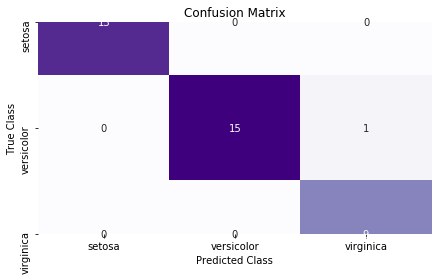

In [54]:
'''
분류기 성능 시각화
 테스트 데이터의 예측 클래스와 정답 클래스를 바탕으로 모델의 품질을 시각적으로 비교할 수 있습니다.
'''
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris() # 데이터 로드

features = iris.data # 특성 행렬
target = iris.target # 타깃 벡터

class_names = iris.target_names # 클래스 이름 리스트

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
                                            features, target, random_state=1)
classifier = LogisticRegression() # 로지스틱 회귀 모델 객체 생성

# 모델을 훈련하고 예측 결과를 계산합니다.
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# 오차 행렬을 만듭니다.
matrix = confusion_matrix(target_test, target_predicted)
# 판다스 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Purples") # 히트맵 생성
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [55]:
'''
분류기 성능 시각화(이어서)
 오차 행렬은 분류기의 성능을 쉽고 효과적으로 보여주는 도구입니다.
 오차 행렬의 열은 예측 클래스를 나타내고 행은 정답 클래스를 나타냅니다.
 오차행렬의 완벽한 모델은 대각선에만 값이 있고 나머지는 모두 0입니다. (나쁜 모델은 모든 셀에 고르게 샘플들이
퍼져 있을 것입니다.)
 오차행렬은 모델이 나쁘다는 것뿐만 아니라 어떻게 나쁜지도 알려줍니다. (잘못 분류된 패턴을 확인할 수 있습니
다.)
 오차행렬은 다중 클래스 환경에도 잘 동작합니다.
 사이킷런의 confusion_matrix 함수를 사용하여 오차 행렬을 계산할 수 있습니다.
'''
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [56]:
'''
회귀 모델 평가
 평균 제곱 오차(mean squared error; MSE)를 사용합니다.
   : 오차가 커질수록 나쁜 모델이다 
'''
'''
 MSE는 예측값과 진짜 갓 사이의 모든 거리를 제곱하여 더한 값입니다.
 MSE의 값이 클수록 전체 제곱 오차가 더 커지므로 더 나쁜 모델입니다.
 사이킷런의 scoring 매개변수값은 높은 값이 낮은 값보다 좋은 것이어야 합니다.
 MSE는 반대로 높은 값이 더 나쁜 모델을 의미합니다.
 때문에 사이킷런은 neg_mean_squared_error를 사용하여 음의 MSE를 전달해야 합니다
'''

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)
ols = LinearRegression() #객체 생성

In [57]:
# 음의 MSE를 사용한 교차검증을 수행합니다.
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [58]:
'''
 회귀 평가 지표 R2 은 모델이 설명하는 타깃 벡터의 분산을 측정합니다
 타깃 벡터의 평균값이 1.0에 가까울수록 더 좋은 모델입니다.
'''
# R^2를 사용한 교차검증을 수행합니다.
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [60]:
'''
군집 모델 평가
 군집을 평가하는 방법은 클러스터의 품질을 측정하는 실루엣 계수입니다.
'''
'''
 클러스터 내의 샘플 간의 거리는 가깝고(조밀한 클러스터) 클러스터 간 거리는 먼것(잘 구분된 클러스터)이 좋은
클러스터라고 생각할 수 있습니다.
 실루엣 계수는 클러스터 내 샘플 간의 거리와 클러스터 간 거리 두 특성을 측정한 하나의 수치를 제공합니다
 silhouette_score 함수의 반환값은 모든 샘플의 실루엣 계수를 평균한 값입니다.
 실루엣 계수의 범위는 -1과 1 사이입니다.
 1은 조밀하고 잘 구분되는 클러스터를 의미합니다.
'''
# 클러스터링 : 비지도학습, 정답 예측 및 비교가 불가능하다 
# 모델에 대한 평가를 실루엣 계수를 사용 
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1) # 특성 행렬을 생성

# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측합니다.
model = KMeans(n_clusters=2, random_state=1).fit(features)
target_predicted = model.labels_ # 예측된 클래스
silhouette_score(features, target_predicted) # 모델 평가

0.8916265564072142

In [61]:
'''
사용자 정의 평가 지표 만들기
 평가 방법을 함수로 만들고 사이킷런의 make_scorer 함수를 사용하여 스코어 score function으로 변환합니다.
'''
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
      features, target, test_size=0.10, random_state=1)


def custom_metric(target_test, target_predicted): # 사용자 정의 지표 함수를 정의
    r2 = r2_score(target_test, target_predicted) # R^2 점수를 계산
    return r2 # R^2 점수를 반환


# 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듭니다.
score = make_scorer(custom_metric, greater_is_better=True) 
classifier = Ridge() # 릿지(ridge) 회귀 모델 객체 생성

In [63]:
'''
사용자 정의 평가 지표 만들기(이어서)
 평가 방법을 함수로 만들고 사이킷런의 make_scorer 함수를 사용하여 스코어 score function으로 변환합니다.
'''
model = classifier.fit(features_train, target_train) # 릿지 회귀 모델 훈련
score(model, features_test, target_test) # 사용자 정의 스코어 함수를 적용

0.9997906102882058

In [64]:
target_predicted = model.predict(features_test) # 예측
r2_score(target_test, target_predicted) # R^2 점수 계산

0.9997906102882058

In [66]:
'''
훈련 세트 크기에 따른 영향 시각화
 학습 곡선은 훈련 세트의 샘플 수가 증가함에 따라 훈련 세트와 교차검증의 성능(정확도나 재현율)을 시각화합니
다.
 더 많은 훈련 데이터를 모아서 학습 알고리즘에 도움이 될지 결정하는 데 널리 사용됩니다 .
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits() # 데이터 로드

features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터 분리

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수를 계산합니다.
train_sizes, train_scores, test_scores = learning_curve(
                                            RandomForestClassifier(), # 분류기
                                            features, # 특성 행렬
                                            target, # 타깃 벡터
                                            cv=10, # 폴드 수
                                            scoring='accuracy', # 성능 지표
                                            n_jobs=-1, # 모든 코어 사용
                                            train_sizes=np.linspace( 0.01, 1.0, 50)) 
                                            # 50개의 훈련 세트 크기

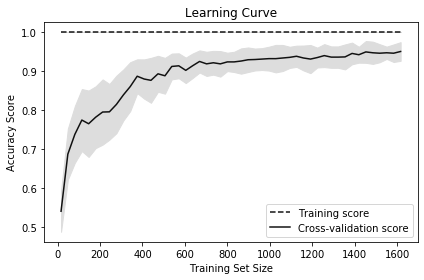

In [74]:
# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프를 그립니다.
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역을 그립니다.
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# 그래프를 출력합니다.
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best") #범례는 결과에 따라 가장 보기 좋은 자리에 붙혀라
plt.tight_layout()
plt.show()
#훈련 세트 샘플의 1%에서 100%까지 50개 크기에서 랜덤 포레스트 분류기의 정확도를 그래프로 출력합니다.
#모델의 교차검증 정확도가 증가하면 추가적인 샘플이 도움이 된다는 것을 의미합니다.

In [75]:
'''
평가 지표 리포트 만들기
 사이킷런의 classification_report는 정밀도, 재현율, F1-점수와 같이 자주 사용하는 평가 지표를 요약하여 보여줍니
다.
 support는 각 클래스에 속한 샘플의 개수를 의미합니다.
 classification_report는 첫번째 블럭에서 각 클래스를 양성 클래스로 가정했을 때 점수를 보여줍니다.
 두번째 블럭은 micro, macro, weighted 평균값을 출력합니다.
 labels 매개변수가 지정되지 않거나 labels 매개변수로 전달된 클래스 레이블이 타깃값에 모두 포함되어 있다면
micro 평균과 같은 의미인 정확도를 출력합니다.
'''
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris() # 데이터 로드
features = iris.data # 특성 행렬
target = iris.target # 타깃 벡터
class_names = iris.target_names # 타깃 클래스 이름의 리스트

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, 
                                                                            random_state=1)
classifier = LogisticRegression() # 로지스틱 회귀 모델 객체 생성
model = classifier.fit(features_train, target_train) # 모델 훈련
target_predicted = model.predict(features_test) # 예측
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names)) # 분류 리포트 새성

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
# 분류 리포트를 만듭니다.(붓꽃이름 대신 라벨 설정가능)
print(classification_report(target_test, target_predicted, labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.72      0.73      0.73        38
weighted avg       0.98      0.97      0.97        38



C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


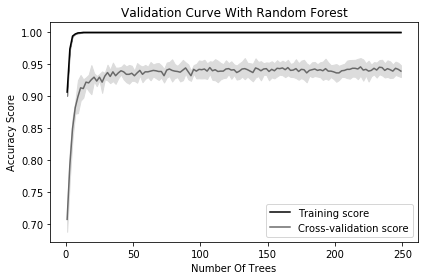

In [79]:
'''
하이퍼파라미터 값의 영향 시각화
 훈련 알고리즘에는 훈련 과정을 시작하기 전에 선택해야만 하는 하이퍼파라미터가 있습니다.
 일부 하이퍼파라미터 값을 변경할 때 모델의 성능 변화는 검증 곡선을 그려서 확인합니다.
 예) 랜덤 포레스트 분류기의 하이퍼파라미터는 앙상블을 할 트리의 개수입니다.
'''
#실습 : 트리 개수가 증가할 때 랜덤 포레스트 분류기의 훈련 세트 정확도와 교차검증 정확도의 변화를 시각화
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits() # 데이터 로드
features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터
param_range = np.arange(1, 250, 2) # 파라미터 값의 범위

# 파라미터 값의 범위를 사용하여 훈련 세트와 테스트 세트의 정확도를 계산합니다.
train_scores, test_scores = validation_curve( RandomForestClassifier(), # 분류기
                                              features, # 특성 행렬
                                              target, # 타깃 벡터
                                              param_name="n_estimators", # 조사할 하이퍼파라미터
                                              param_range=param_range, # 하이퍼파라미터 값의 범위
                                              cv=3, # 폴드 수
                                              scoring="accuracy", # 성능 지표
                                              n_jobs=-1) # 모든 코어 사용 
                                             
train_mean = np.mean(train_scores, axis=1) # 훈련 세트 점수의 평균과 표준 편차를 계산
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1) # 테스트 세트 점수의 평균과 표준 편차를 계산
test_std = np.std(test_scores, axis=1)
                                             
# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그립니다.
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로 그립니다.
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

'''
 사이킷런에서 validation_curve 함수로 검증 곡선을 계산할 수 있습니다.
 param_name 매개변수는 하이퍼파라미터의 이름을 지정합니다.
 param_range 매개변수는 하이퍼파라미터의 범위를 지정합니다.
 scoring 매개변수는 모델을 평가하는데 사용할 지표입니다
'''